<h3> Importando as bibliotecas Pandas e SciKit Learn </h3>

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_squared_error, r2_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

<h3>Lendo os dados do modelo - automóveis</h3>

Usaremos um dataset de consumo de combustível, contendo dados de consumo de combustível e de emissão estimada de CO2 de veículos leves à venda em concessionárias no Canadá

*   **MODELYEAR (Ano do Modelo)** e.g. 2014
*   **MAKE (Montadora)** e.g. Acura
*   **MODEL (Fabricante)** e.g. ILX
*   **VEHICLE CLASS (Categoria)** e.g. SUV
*   **ENGINE SIZE (Volume do Motor)** e.g. 4.7
*   **CYLINDERS (Número de Cilindros)** e.g 6
*   **TRANSMISSION (Tipo da Transmissão)** e.g. A6
*   **FUELTYPE (Tipo do Combustível)** e.g. z
*   **FUEL CONSUMPTION in CITY(L/100 km) (Consumo de Combustível na Cidade)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km) (Consumo de Combustível na Estrada)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km) (Consumo de Combustível Combinado)** e.g. 9.2
*   **CO2 EMISSIONS (g/km) Emissão de CO2** e.g. 182   --> low --> 0


**Entendendo os dados categóricos**

**Model**
    <li>4WD/4X4 = Four-wheel drive</li>
	<li>AWD = All-wheel drive</li>
	<li>FFV = Flexible-fuel vehicle</li>
	<li>SWB = Short wheelbase</li>
	<li>LWB = Long wheelbase</li>
	<li>EWB = Extended wheelbase</li>
**Transmission**
    <li>A = automatic</li>
	<li>AM = automated manual</li>
	<li>AS = automatic with select shift</li>
	<li>AV = continuously variable</li>
	<li>M = manual</li>
	<li>3 – 10 = Número de Marchas</li>
    
**Fuel type**	
    <li>X = regular gasoline</li>
	<li>Z = premium gasoline</li>
	<li>D = diesel</li>
	<li>E = ethanol (E85)</li>
	<li>N = natural gas</li>
    
**Fuel consumption**
O Consumo de Combustível em cidades e rodovias é mostrado em litros por 100 quilômetros (L/100 km).
A classificação combinada (55% cidade, 45% hwy) é mostrada em L/100 km e em milhas por galão imperial (mpg)

**CO2 Emissions**
As emissões de dióxido de carbono pelo tubo de escape (em gramas por quilômetro) é exibida considerado a condução combinada na cidade e na estrada

**CO2 Rating**
A emissão de dióxido de carbono pelo tubo de escape é classificada em uma escala de 1 (pior) a 10 (melhor)

**Smog Rating**
As emissões através do tubo de escape de poluentes são classificadas em uma escala de 1 (pior) a 10 (melhor)


In [2]:
dataFrame = pd.read_csv('data/FuelConsumption2022.csv')
dataFrame.head()

,Model Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [3]:
dataFrame.shape

(945, 15)

In [4]:
dataFrame.columns

Index(['Model Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size (L)',
       'Cylinders', 'Transmission', 'Fuel Type',
       'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)',
       'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)',
       'CO2 Emissions (g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')

In [27]:
dataFrame.dtypes

Model Year                            int64
Make                                 object
Model                                object
Vehicle Class                        object
Engine Size (L)                     float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions (g/km)                  int64
CO2 Rating                            int64
Smog Rating                           int64
dtype: object

In [28]:
dataFrame.describe().round(2)

,Model Year,Engine Size (L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
count,945.0,945.00,945.00,945.00,945.00,945.00,945.00,945.00,945.00,945.00
mean,2022.0,3.20,5.67,12.52,9.37,11.10,27.22,259.41,4.53,4.95
std,0.0,1.37,1.93,3.45,2.29,2.88,7.68,64.49,1.47,1.68
min,2022.0,1.20,3.00,4.00,3.90,4.00,11.00,94.00,1.00,1.00
25%,2022.0,2.00,4.00,10.20,7.70,9.10,22.00,214.00,3.00,3.00
50%,2022.0,3.00,6.00,12.20,9.20,10.80,26.00,258.00,4.00,5.00
75%,2022.0,3.80,6.00,14.70,10.70,12.90,31.00,301.00,5.00,6.00
max,2022.0,8.00,16.00,30.30,20.90,26.10,71.00,608.00,10.00,7.00


In [29]:
dataFrame.corr().round(4)

,Model Year,Engine Size (L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
Model Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine Size (L),NaN,1.0000,0.9206,0.8341,0.7461,0.8172,-0.7029,0.8226,-0.7644,-0.4484
Cylinders,NaN,0.9206,1.0000,0.8454,0.7356,0.8209,-0.6930,0.8324,-0.7611,-0.5022
Fuel Consumption City (L/100 km),NaN,0.8341,0.8454,1.0000,0.9219,0.9902,-0.9094,0.9654,-0.9203,-0.5229
Fuel Consumption Hwy (L/100 km),NaN,0.7461,0.7356,0.9219,1.0000,0.9668,-0.8770,0.9338,-0.8946,-0.3990
Fuel Consumption Comb (L/100 km),NaN,0.8172,0.8209,0.9902,0.9668,1.0000,-0.9143,0.9717,-0.9277,-0.4887
Fuel Consumption Comb (mpg),NaN,-0.7029,-0.6930,-0.9094,-0.8770,-0.9143,1.0000,-0.9130,0.9494,0.4721
CO2 Emissions (g/km),NaN,0.8226,0.8324,0.9654,0.9338,0.9717,-0.9130,1.0000,-0.9546,-0.5186
CO2 Rating,NaN,-0.7644,-0.7611,-0.9203,-0.8946,-0.9277,0.9494,-0.9546,1.0000,0.5003
Smog Rating,NaN,-0.4484,-0.5022,-0.5229,-0.3990,-0.4887,0.4721,-0.5186,0.5003,1.0000


<h3>Verificando a correlação da variável dependente (CO2Emissions) e da variavel independente(EngineSize)</h3>


In [30]:
dataFrame.corr()

,Model Year,Engine Size (L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
Model Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine Size (L),NaN,1.000000,0.920623,0.834144,0.746124,0.817171,-0.702874,0.822554,-0.764396,-0.448364
Cylinders,NaN,0.920623,1.000000,0.845364,0.735560,0.820895,-0.693026,0.832352,-0.761133,-0.502219
Fuel Consumption City (L/100 km),NaN,0.834144,0.845364,1.000000,0.921878,0.990171,-0.909420,0.965437,-0.920278,-0.522857
Fuel Consumption Hwy (L/100 km),NaN,0.746124,0.735560,0.921878,1.000000,0.966774,-0.877030,0.933750,-0.894566,-0.399030
Fuel Consumption Comb (L/100 km),NaN,0.817171,0.820895,0.990171,0.966774,1.000000,-0.914296,0.971677,-0.927724,-0.488721
Fuel Consumption Comb (mpg),NaN,-0.702874,-0.693026,-0.909420,-0.877030,-0.914296,1.000000,-0.912990,0.949395,0.472080
CO2 Emissions (g/km),NaN,0.822554,0.832352,0.965437,0.933750,0.971677,-0.912990,1.000000,-0.954616,-0.518635
CO2 Rating,NaN,-0.764396,-0.761133,-0.920278,-0.894566,-0.927724,0.949395,-0.954616,1.000000,0.500343
Smog Rating,NaN,-0.448364,-0.502219,-0.522857,-0.399030,-0.488721,0.472080,-0.518635,0.500343,1.000000


<h3>Analisando o Comportamento da Variável dependente</h3>

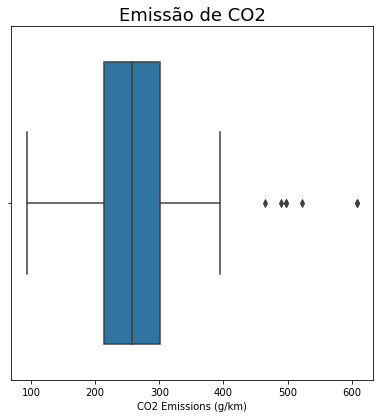

In [31]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
ax.set_title('Emissão de CO2', fontsize=18)
sns.boxplot(x='CO2 Emissions (g/km)', data=dataFrame, ax=ax)
plt.show()

<h3>Analisando o Comportamento da Variável dependente considerando uma variável categórica</h3>


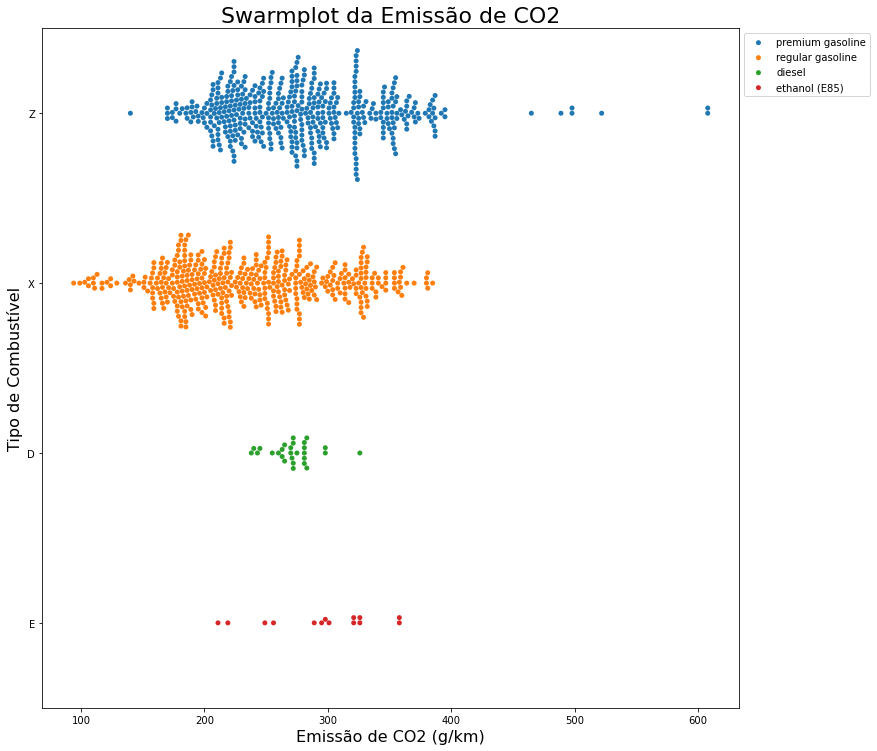

In [32]:
f, ax = plt.subplots(figsize=(12.5, 12.5))
ax.set_title('Swarmplot da Emissão de CO2', fontsize=22)

sns.swarmplot(x='CO2 Emissions (g/km)', y='Fuel Type', data=dataFrame, ax=ax)
ax.set_ylabel('Tipo de Combustível', fontsize=16)
ax.set_xlabel('Emissão de CO2 (g/km)', fontsize=16)

plt.legend(labels=["premium gasoline","regular gasoline", "diesel", "ethanol (E85)"], loc = 'upper left', bbox_to_anchor = (1,1))

plt.show()

<h3>Visualizando a correlação entre variáveis através do pairplot</h3>

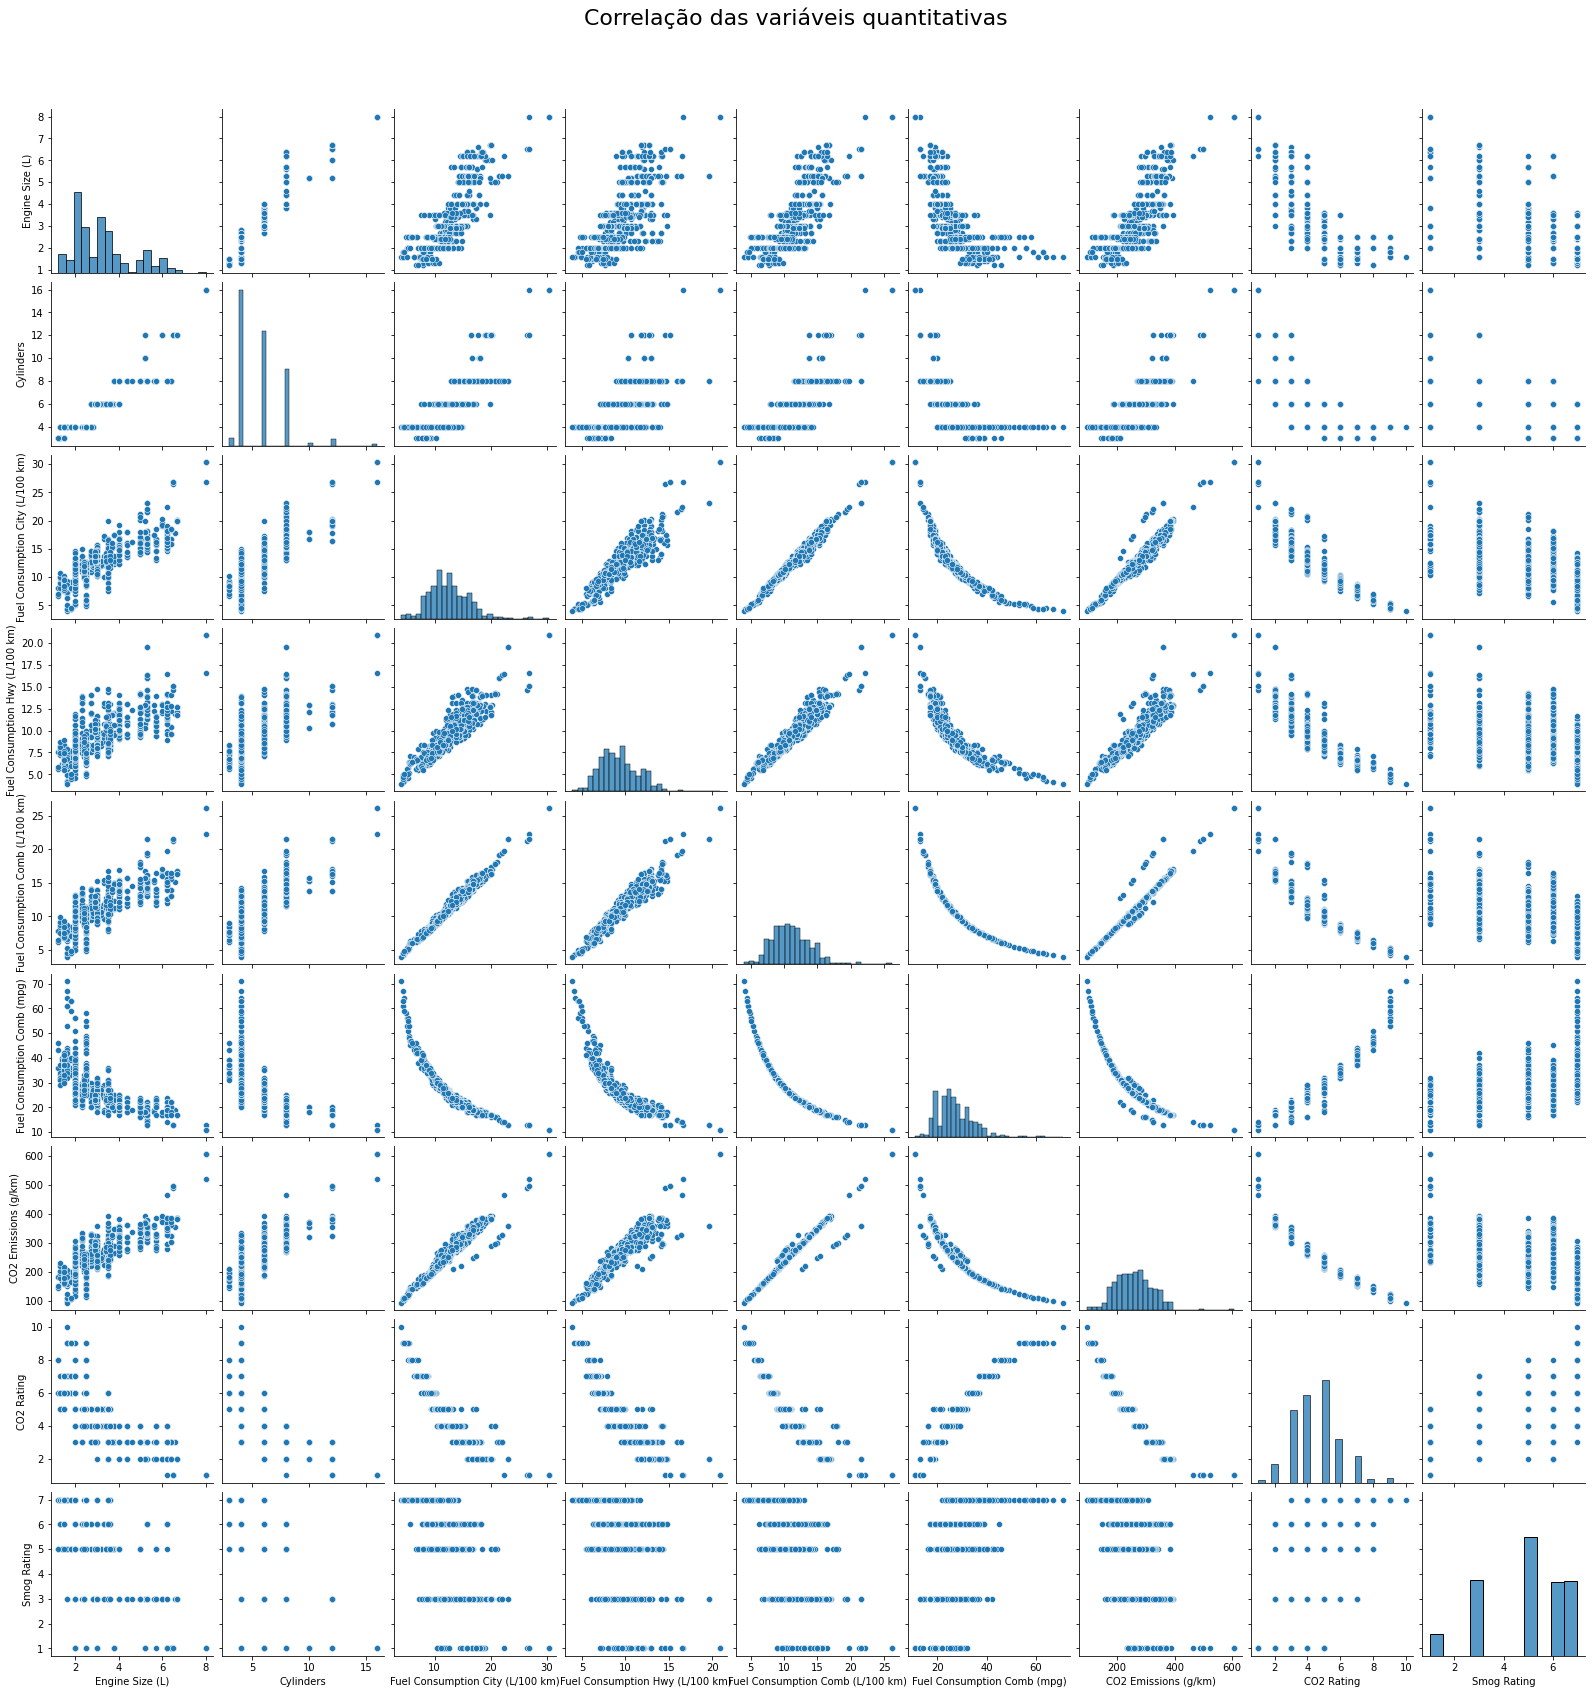

In [41]:
var_avaliadas = ['Engine Size (L)', 'Cylinders',  'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)',
                 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions (g/km)', 'CO2 Rating', 'Smog Rating']

ax = sns.pairplot(data=dataFrame[var_avaliadas])
ax.fig.suptitle('Correlação das variáveis quantitativas',  y=1.05, fontsize=22)

plt.show()

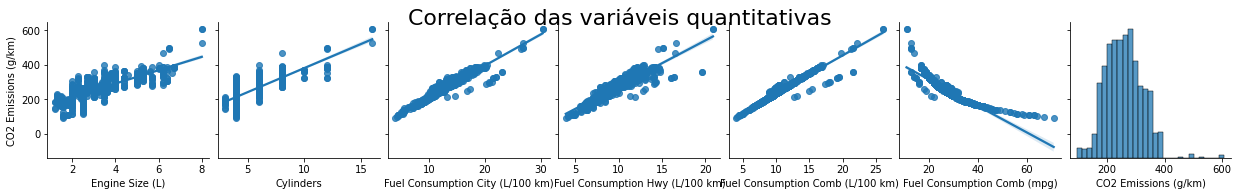

In [39]:
var_avaliadas = ['Engine Size (L)', 'Cylinders',  'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)',
                 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions (g/km)']

ax = sns.pairplot(data=dataFrame[var_avaliadas], y_vars=['CO2 Emissions (g/km)'], kind='reg')
ax.fig.suptitle('Correlação das variáveis quantitativas',  y=1.05, fontsize=22)


plt.show()

<h3>Plotando um scatterplot da variável dependente (CO2Emissions) e da variavel independente(EngineSize)</h3>

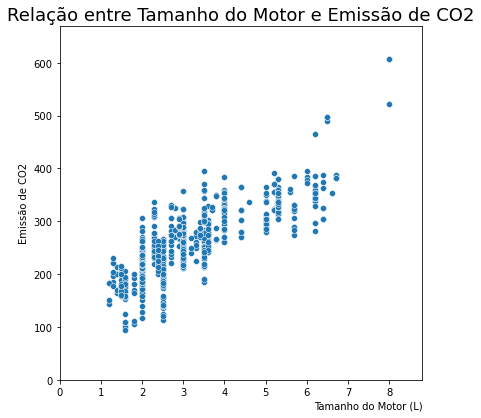

In [40]:
f, ax = plt.subplots(figsize=(6.5, 6.5))

sns.scatterplot(x='Engine Size (L)', y='CO2 Emissions (g/km)',
                data=dataFrame,  ax=ax)


ax.set_title('Relação entre Tamanho do Motor e Emissão de CO2', fontsize=18)
ax.set_ylabel('Emissão de CO2', loc='center', fontsize=10)
ax.set_xlabel('Tamanho do Motor (L)', loc='right', fontsize=10)

ax.set_xlim(xmin=0, xmax=(dataFrame['Engine Size (L)'].max() * 1.1))
ax.set_ylim(ymin=0, ymax=(dataFrame['CO2 Emissions (g/km)'].max() * 1.1))



plt.show()

<h3>Renomeando a variável dependente (CO2Emissions) e a variavel independente(EngineSize)</h3>

In [13]:
dataFrame[['Engine Size (L)', 'CO2 Emissions (g/km)']].head()

,Engine Size (L),CO2 Emissions (g/km)
0,2.4,200
1,3.5,263
2,2.0,232
3,2.0,242
4,2.0,230


<h2> Regressão Linear - Inferência </h2>

<h3>Calculando o coefieciente angular da reta de Regressão Linear</h3>

A dedução das fórmulas abaixo é feita usando técnicas de derivação e está fora do escopo deste curso:


<img src='img/regressao_coef.png' width='65%'>



In [14]:
dados = pd.DataFrame()
dados['X'] = dataFrame['Engine Size (L)']
dados['Y'] = dataFrame['CO2 Emissions (g/km)']
dados['XY'] = dados.X * dados.Y
dados['X2'] = dados.X * dados.X

coef_angular = ((dados.shape[0] * dados.XY.sum()) - (dados.X.sum() * dados.Y.sum())) / ((dados.shape[0] * dados.X2.sum()) - (dados.X.sum() ** 2))
print(f'Coeficiente angular: {coef_angular.round(3)}')

Coeficiente angular: 38.598


<h3>Calculando o coefieciente linear da reta de Regressão Linear</h3>

In [15]:
coef_linear = (dados.Y.sum() - coef_angular * dados.X.sum()) / dados.shape[0]  
print(f'Coeficiente linear: {coef_linear.round(3)}')


Coeficiente linear: 135.856


<h3> Predizendo o valor de Emissão de CO2 para um novo carro com EngineSize igual a 2,4 </h3>


In [16]:
novo_carro_eng_size = 2.4
emissao_co2 = coef_angular * novo_carro_eng_size + coef_linear
print(f'Tamanho do motor do novo modelo: {novo_carro_eng_size}')
print(f'Valor previsto de emissão de CO2: {emissao_co2.round(3)}')

Tamanho do motor do novo modelo: 2.4
Valor previsto de emissão de CO2: 228.491


<h3> Criando e utilizando um regressor linear com scikit-learn</h3>

In [17]:
lr = LinearRegression().fit(X=dataFrame[['Engine Size (L)']], y=dataFrame['CO2 Emissions (g/km)'])
print(f'Coeficiente Angular: {lr.coef_[0].round(3)}')
print(f'Coeficiente Linear: {lr.intercept_.round(3)}')

novo = pd.DataFrame(np.array([novo_carro_eng_size]), columns=['Engine Size (L)'])

emissao_CO2_model = lr.predict(X=novo[['Engine Size (L)']])[0];

print(f'Valor previsto de emissão de CO2: {emissao_CO2_model.round(3)}')

Coeficiente Angular: 38.598
Coeficiente Linear: 135.856
Valor previsto de emissão de CO2: 228.491


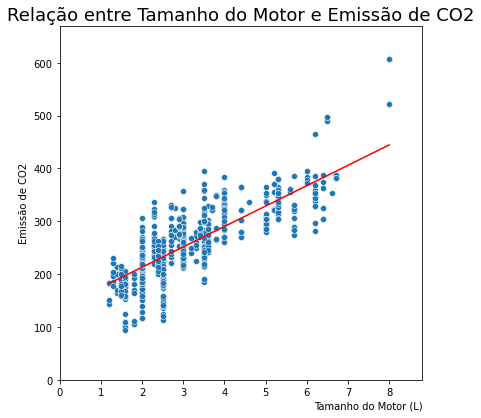

In [18]:
f, ax = plt.subplots(figsize=(6.5, 6.5))

ax.set_title('Relação entre Tamanho do Motor e Emissão de CO2', fontsize=18)
ax.set_ylabel('Emissão de CO2', loc='center', fontsize=10)
ax.set_xlabel('Tamanho do Motor (L)', loc='right', fontsize=10)

ax.set_xlim(xmin=0, xmax=(dataFrame['Engine Size (L)'].max() * 1.1))
ax.set_ylim(ymin=0, ymax=(dataFrame['CO2 Emissions (g/km)'].max() * 1.1))

sns.scatterplot(x='Engine Size (L)', y='CO2 Emissions (g/km)',
                data=dataFrame, ax=ax)

sns.lineplot(x=dataFrame['Engine Size (L)'], y = lr.predict(dataFrame[['Engine Size (L)']]), color="red")

plt.show()

<h2> Regressão Linear - Predição </h2>

<h3>Construindo um preditor baseando em Regressão Linear Simples</h3>

In [19]:
dadosRLSimples = pd.DataFrame()
dadosRLSimples['EngineSize'] = dataFrame['Engine Size (L)']
dadosRLSimples['CO2Emissions'] = dataFrame['CO2 Emissions (g/km)']

X_train, X_test, y_train, y_test = train_test_split(dadosRLSimples[['EngineSize']], dadosRLSimples.CO2Emissions, test_size=0.3, random_state=1234)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(661, 1)
(284, 1)
(661,)
(284,)


In [20]:
lr = LinearRegression().fit(X=X_train, y=y_train)
print(f'Coeficiente Angular: {lr.coef_[0].round(3)}')
print(f'Coeficiente Linear: {lr.intercept_.round(3)}')

Coeficiente Angular: 37.384
Coeficiente Linear: 138.336


**Treino e Teste em dataset dividido**

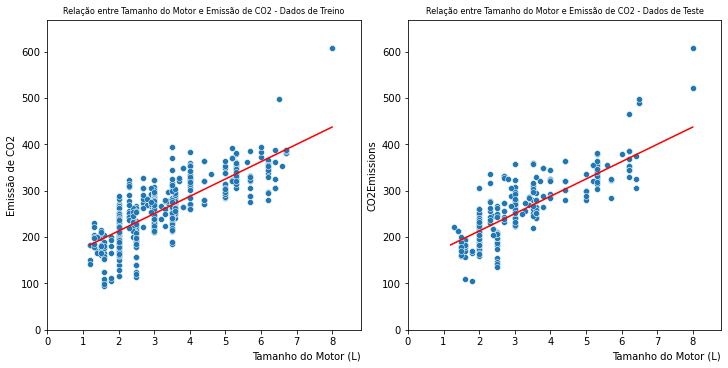

In [42]:
fig = plt.figure(constrained_layout=True)
gs = GridSpec(1, 2, figure=fig)
fig.set_size_inches(10,5)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

X_train.index = range(X_train.shape[0])
y_train.index =  range(y_train.shape[0])

X_test.index = range(X_test.shape[0])
y_test.index =  range(y_test.shape[0])

ax0.set_title('Relação entre Tamanho do Motor e Emissão de CO2 - Dados de Treino', fontsize=8)
ax0.set_ylabel('Emissão de CO2', loc='center', fontsize=10)
ax0.set_xlabel('Tamanho do Motor (L)', loc='right', fontsize=10)

ax0.set_xlim(xmin=0, xmax=(dadosRLSimples.EngineSize.max() * 1.1))
ax0.set_ylim(ymin=0, ymax=(dadosRLSimples.CO2Emissions.max() * 1.1))

sns.scatterplot(x=X_train.EngineSize, y=y_train, ax=ax0)
sns.lineplot(x=dadosRLSimples.EngineSize, y = lr.predict(dadosRLSimples[['EngineSize']]), color="red", ax=ax0)

ax1.set_title('Relação entre Tamanho do Motor e Emissão de CO2 - Dados de Teste', fontsize=8)
ax1.set_xlabel('Tamanho do Motor (L)', loc='right', fontsize=10)
ax1.set_xlim(xmin=0, xmax=(dadosRLSimples.EngineSize.max() * 1.1))
ax1.set_ylim(ymin=0, ymax=(dadosRLSimples.CO2Emissions.max() * 1.1))

sns.scatterplot(x=X_test.EngineSize, y=y_test, ax=ax1)
sns.lineplot(x=dadosRLSimples.EngineSize, y = lr.predict(dadosRLSimples[['EngineSize']]), color="red", ax=ax1)


plt.show()

In [45]:
def metricas(real : list, predict : list):
    r2 = r2_score(real, predict).round(2)
    mse = mean_squared_error(real, predict).round(2)
    rmse = np.sqrt(mse).round(2)
    erro_pct = np.round(rmse / np.mean(predict) * 100, 2)   
    return r2, mse, rmse, erro_pct

In [47]:
r2_treino, mse_treino, rmse_treino, erro_pct_pred_treino = metricas(y_train, lr.predict(X_train))

print(f'Coeficiente de Determinação :{r2_treino}.')
print(f'Erro médio quadrático : {mse_treino}.')
print(f'Raiz do Erro médio quadrático : {rmse_treino}.')
print(f'Media da Emissão de CO2: {np.round(np.mean(y_train), 2)}')
print(f'Erro percentual do preditor: {erro_pct_pred_treino}%')

Coeficiente de Determinação :0.66.
Erro médio quadrático : 1315.8.
Raiz do Erro médio quadrático : 36.27.
Media da Emissão de CO2: 257.29
Erro percentual do preditor: 14.1%


<h3>Métricas com dados de Teste</h3>

In [48]:
r2, mse, rmse, erro_pct_pred = metricas(y_test, lr.predict(X_test))

print(f'Coeficiente de Determinação :{r2}.')
print(f'Erro médio quadrático : {mse}.')
print(f'Raiz do Erro médio quadrático : {rmse}.')
print(f'Media da Emissão de CO2: {np.round(np.mean(co2_real), 2)}')
print(f'Erro percentual do preditor: {erro_pct_pred}%')


Coeficiente de Determinação :0.7.
Erro médio quadrático : 1423.6.
Raiz do Erro médio quadrático : 37.73.
Media da Emissão de CO2: 264.34
Erro percentual do preditor: 14.53%


In [49]:
dataAval = pd.DataFrame()
df = pd.DataFrame({'Regressão Linear Simples' : [r2, mse, rmse, erro_pct_pred]}).T
df.columns = ['r2', 'mse', 'rmse', 'erro %']
dataAval = dataAval.append(df)
dataAval

,r2,mse,rmse,erro %
Regressão Linear Simples,0.7,1423.6,37.73,14.53


In [51]:
dataError = pd.DataFrame()
dataError['EngineSize'] = X_test.EngineSize
dataError['CO2_Real'] = y_test
dataError['CO2_Predict'] = lr.predict(X_test)
dataError['Error'] = dataError['CO2_Real'] - dataError['CO2_Predict']
dataError.index = range(dataError.shape[0])
dataError.head()

,EngineSize,CO2_Real,CO2_Predict,Error
0,5.3,329,336.473827,-7.473827
1,1.6,195,198.151442,-3.151442
2,2.0,212,213.105214,-1.105214
3,1.4,214,190.674557,23.325443
4,4.4,302,302.827841,-0.827841


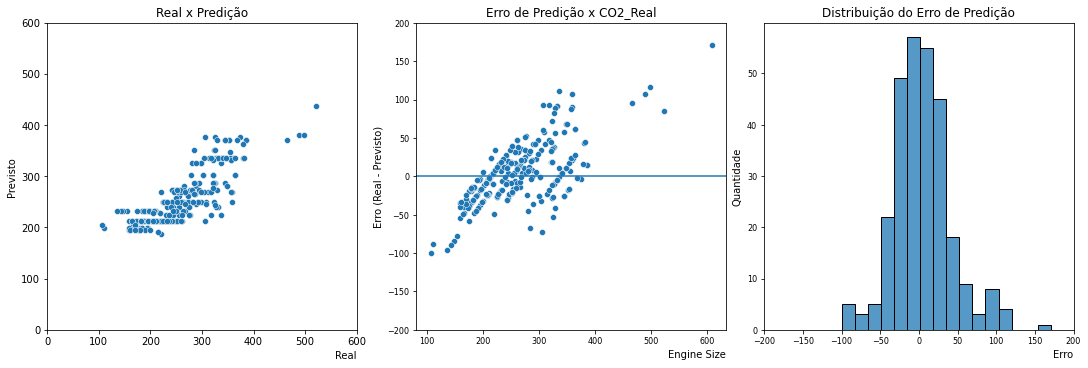

In [52]:
fig = plt.figure(constrained_layout=True)
gs = GridSpec(1, 3, figure=fig)
fig.set_size_inches(15,5)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])

ax0.set_title('Real x Predição', fontsize=12)
ax0.set_xlabel('Real', loc='right', fontsize=10)
ax0.set_ylabel('Previsto', loc='center', fontsize=10)
ax0.set_ylim(ymin=0, ymax=600)
ax0.set_xlim(xmin=0, xmax=600)

ax0 = sns.scatterplot(x=co2_real, y=co2_predicted, ax=ax0)

ax1.set_title('Erro de Predição x CO2_Real', fontsize=12)
ax1.set_xlabel('Engine Size', loc='right', fontsize=10)
ax1.set_ylabel('Erro (Real - Previsto)', loc='center', fontsize=10)
ax1.set_ylim(ymin=-200, ymax=200)
ax1.tick_params(labelsize=8)

ax1 = sns.scatterplot(x=dataError.CO2_Real, y= dataError.Error, ax=ax1)
ax1.axhline(0)


ax2.set_title('Distribuição do Erro de Predição', fontsize=12)
ax2.set_xlabel('Erro', loc='right', fontsize=10)
ax2.set_ylabel('Quantidade', loc='center', fontsize=10)
ax2.set_xlim(xmin=-200, xmax=200)
ax2.tick_params(labelsize=8)

sns.histplot(data=dataError, x="Error", bins=16, ax=ax2)

plt.show()